# Exercise - Visualization of Data

### Step 1. Import the necessary libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [84]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/auto-mpg.csv")

### Step 3. Perform basic EDA to understand the structure of the data

In [85]:
mpg_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
231,15.5,8,400.0,190,4325,12.2,77,1,chrysler cordoba
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
366,17.6,6,225.0,85,3465,16.6,81,1,chrysler lebaron salon
44,13.0,8,400.0,175,5140,12.0,71,1,pontiac safari (sw)
321,32.2,4,108.0,75,2265,15.2,80,3,toyota corolla
82,23.0,4,120.0,97,2506,14.5,72,3,toyouta corona mark ii (sw)
291,19.2,8,267.0,125,3605,15.0,79,1,chevrolet malibu classic (sw)
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
283,20.2,6,232.0,90,3265,18.2,79,1,amc concord dl 6


In [86]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [87]:
mpg_df.shape

(398, 9)

In [88]:
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [89]:
mpg_df = mpg_df.drop('car name', axis = 1)

In [90]:
mpg_df.replace('?',np.NaN)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [91]:
hpIsDigit = pd.DataFrame(mpg_df.horsepower.str.isdigit())
mpg_df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [92]:
mpg_df['horsepower'].replace('?', np.nan, inplace = True)
mpg_df['horsepower']=mpg_df['horsepower'].astype(float)

In [93]:
mpg_df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [94]:
mpg_df['horsepower'].replace(np.nan, mpg_df["horsepower"].median(), inplace = True)
mpg_df["horsepower"].median()

93.5

In [95]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

### Step 4. Check and handle the missing values, if any.

In [96]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

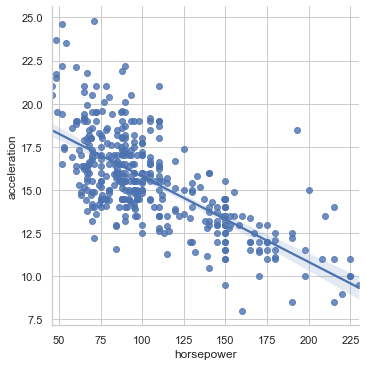

In [97]:
sns.set_style('whitegrid')
sns.lmplot(x ='horsepower', y ='acceleration', data = mpg_df)

### The acceleration is decreasing relative to the plot, i.e; they have a negative correlation.

### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

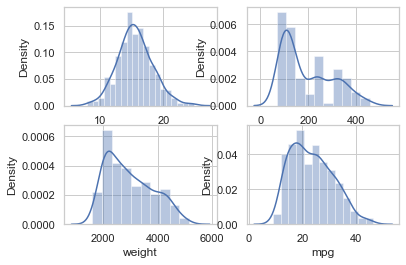

In [98]:
# mpg_df[['acceleration','displacement','weight','mpg']].hist()
from pylab import *
import warnings
warnings.filterwarnings('ignore')
subplot(2,2,1)
ax = sns.distplot(mpg_df['acceleration'])

subplot(2,2,2)
ax = sns.distplot(mpg_df['displacement'])

subplot(2,2,3)
ax = sns.distplot(mpg_df['weight'])

subplot(2,2,4)
ax = sns.distplot(mpg_df['mpg'])
plt.show()




### Acceleration follows a normal distribution while displacement, weight and mpg has a skewed distribution. 

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file. 

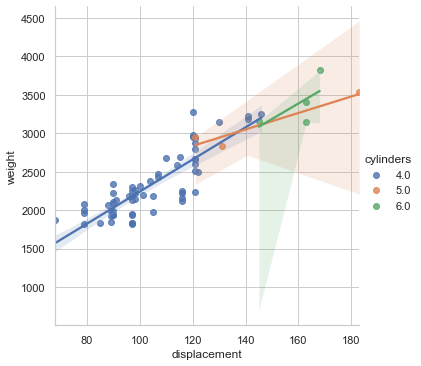

In [108]:
sns.set_style('whitegrid')
sns.lmplot(x ='displacement', y ='weight',hue = "cylinders", data = mpg_df.where(mpg_df["origin"]==2).dropna())
plt.savefig('step7.png')

### The weight increases with the engine displacement, and the heavier cars with more engine displacement tends to have more number of cylinders.

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

<AxesSubplot:xlabel='origin', ylabel='count'>

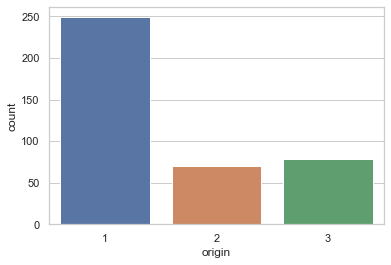

In [110]:
sns.countplot(x = "origin", data=mpg_df)

### Most of the cars are american, followed by asian and europian cars.

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same

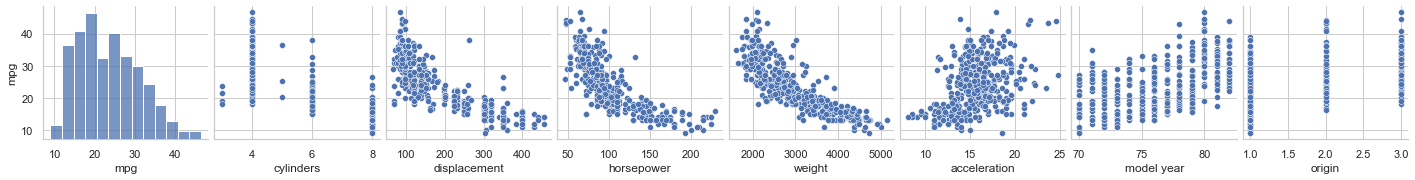

In [113]:
sns.pairplot(mpg_df, y_vars= "mpg", x_vars=mpg_df.columns.values)

### mpg follows a normal distribution, mpg tends to descrease as the number of cylinders increase, the mpg decreases as engine displacement, horsepower and weight increases. 

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

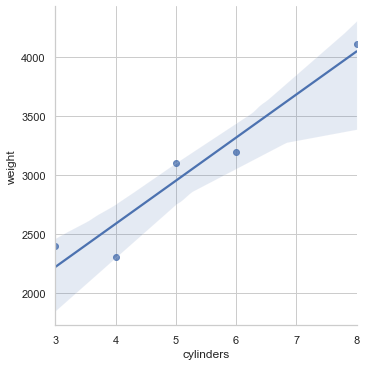

In [124]:

sns.set_style('whitegrid')
sns.lmplot(x ='cylinders', y ='weight', data = mpg_df[['weight','cylinders']].groupby("cylinders").mean().reset_index())


### Weight increases as the number of cylinders increase

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

<AxesSubplot:>

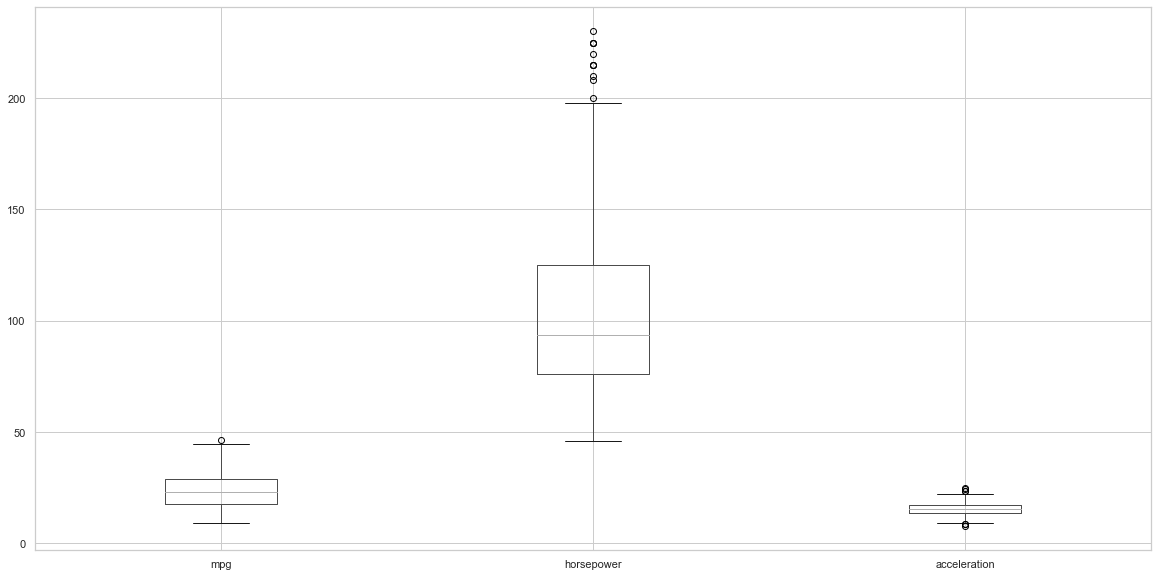

In [129]:
columns = ['mpg','horsepower','acceleration']
mpg_df.boxplot(column = columns, figsize = (20,10))

In [135]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])

<AxesSubplot:>

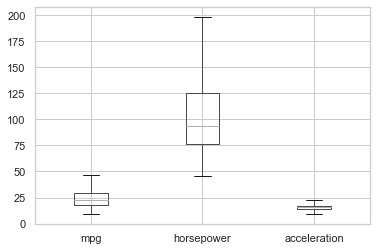

In [136]:
columns = ['mpg','horsepower','acceleration']
mpg_df.boxplot(column = columns)

### mpg, horsepower and acceleration had a skewed distribution and had significant outliers.

### Step 12. Plot the correlations for variables.

<AxesSubplot:>

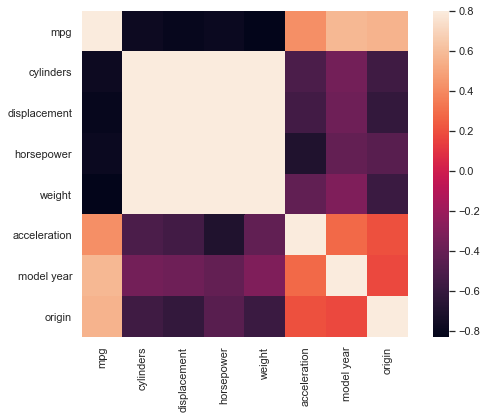

In [137]:
corrmat = mpg_df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

### There is strong positive correlation between (mpg and origin) and (model year and mpg), and strong nrgative correlation for (mpg with weight, horsepower, displacement and cyliners).